In [66]:
# https://www.kaggle.com/competitions/titanic/overview

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [90]:
from fastai.vision.all import *
from fastbook import *
from torch.utils.data import TensorDataset, DataLoader
from fastai.optimizer import SGD
from sklearn.model_selection import train_test_split

In [69]:
trainFile = pd.read_csv('.data/titanic/train.csv')
testFile = pd.read_csv('.data/titanic/test.csv')
trainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
len(trainFile), len(testFile)

(891, 418)

In [71]:
sexCount = trainFile['Sex'].value_counts()
survivedCount = trainFile['Survived'].value_counts()
sexCount, survivedCount

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Survived
 0    549
 1    342
 Name: count, dtype: int64)

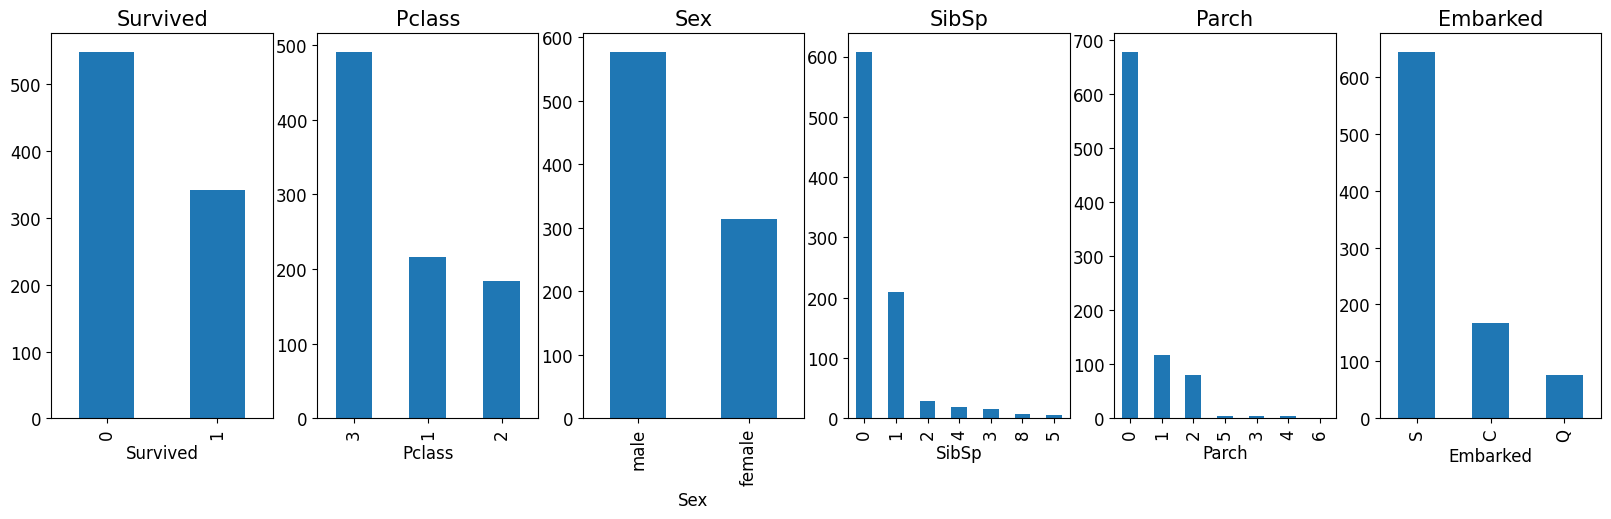

In [72]:
columns_to_plot = trainFile.columns.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'])
fig, ax = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 5))
for idx, column in enumerate(columns_to_plot):
    survivedCount = trainFile[column].value_counts()
    survivedCount.plot(kind='bar', ax=ax[idx])  # Używamy indeksu liczbowego
    ax[idx].set_title(column, fontsize=15)

<Axes: xlabel='Fare', ylabel='Count'>

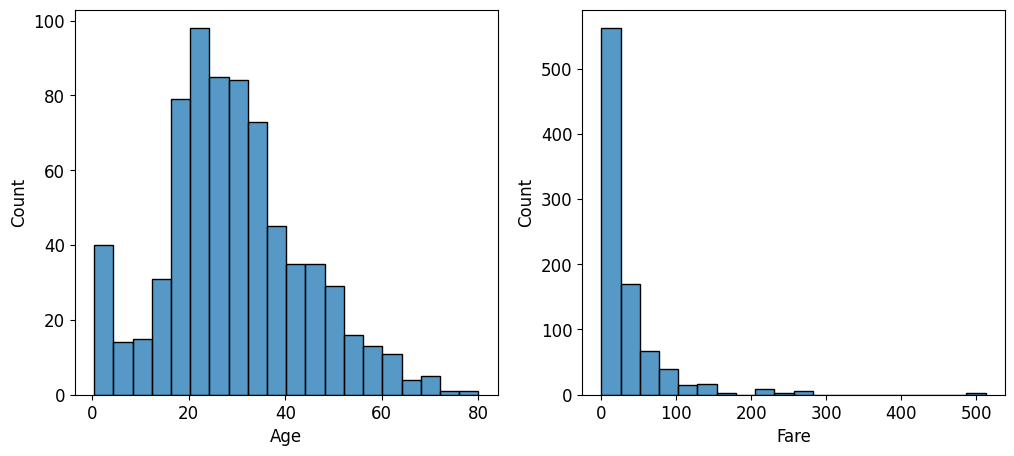

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(trainFile['Age'], bins=20, ax=ax[0])
sns.histplot(trainFile['Fare'], bins=20, ax=ax[1])

In [74]:
trainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
testFile = pd.read_csv('.data/titanic/test.csv')
testFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [76]:
trainFile['Age'] = trainFile['Age'].fillna(trainFile['Age'].median())
testFile['Age'] = testFile['Age'].fillna(testFile['Age'].median())
trainFile['Fare'] = trainFile['Fare'].fillna(trainFile['Fare'].median())
testFile['Fare'] = testFile['Fare'].fillna(testFile['Fare'].median())
trainFile['Embarked'] = trainFile['Embarked'].fillna(trainFile['Embarked'].mode()[0])
testFile['Embarked'] = testFile['Embarked'].fillna(testFile['Embarked'].mode()[0])
trainFile['Cabin'] = trainFile['Cabin'].fillna('U')
testFile['Cabin'] = testFile['Cabin'].fillna('U')
testFile.info(), trainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [77]:
trainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [78]:
trainFile = trainFile.drop(['PassengerId', 'Name'], axis=1)
testFile = testFile.drop(['PassengerId', 'Name'], axis=1)

In [87]:
columns_to_code = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for col in columns_to_code:
    trainFile[col] = pd.Categorical(trainFile[col]).codes.astype('float32')
    testFile[col] = pd.Categorical(testFile[col]).codes.astype('float32')
trainFile.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,147.0,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,147.0,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,147.0,2.0


In [97]:
x = torch.tensor(trainFile.drop('Survived', axis=1).to_numpy(), dtype=torch.float32)
y = torch.tensor(trainFile['Survived'].to_numpy(), dtype=torch.float32)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
x_train[:5], y_train[:5]

(tensor([[  1.0000,   1.0000,  45.5000,   0.0000,   0.0000,  20.0000,  28.5000,  56.0000,   2.0000],
         [  2.0000,   1.0000,  23.0000,   0.0000,   0.0000, 228.0000,  13.0000, 147.0000,   2.0000],
         [  3.0000,   1.0000,  32.0000,   0.0000,   0.0000, 665.0000,   7.9250, 147.0000,   2.0000],
         [  3.0000,   1.0000,  26.0000,   1.0000,   0.0000, 398.0000,   7.8542, 147.0000,   2.0000],
         [  3.0000,   0.0000,   6.0000,   4.0000,   2.0000, 333.0000,  31.2750, 147.0000,   2.0000]]),
 tensor([0., 0., 0., 0., 0.]))

In [98]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

(torch.Size([712, 9]),
 torch.Size([712]),
 torch.Size([179, 9]),
 torch.Size([179]))

In [100]:
loss_func = nn.BCELoss()